# **Data Science Project**
##Team Members:

1.   Irfhana Zakir Hussain - RA1811027010100
2.   Jayadurga V - RA1811027010097

Dataset in use: https://www.kaggle.com/imnikhilanand/heart-attack-prediction

##Objective

To predict whether a patient is at risk for a heart attack. This is a binary outcome. 
*   Positive (+) = 1, patient is at risk
*   Negative (-) = 0, patient is not at risk



In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

##**Discovery Phase**


In [5]:
dataset = pd.read_csv('/content/sample_data/data.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


### Understanding Our Dataset
*   age (#)
*   sex : 1 = Male, 0 = Female (Binary)
*   (cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
*   (trestbps) resting blood pressure (#)
*   (chol) serum cholestoral in mg/dl (#)
*   (fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]
*   (restecg) resting electrocardiographic results [values 0,1,2]
*   (thalach) maximum heart rate achieved (#)
*   (exang) exercise induced angina (Binary) [1 = yes; 0 = no]
*   (oldpeak) = ST depression induced by exercise relative to rest (#)
*   (slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)
*   (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy
*   (thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]



In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


From here, we can see that there are no missing values in the 13 features.

In [7]:
dataset.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [8]:
dataset.columns
dataset.rename(columns={'num       ': 'risk'}, inplace=True)

In [9]:
dataset=dataset.replace('?',None)

In [11]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,risk
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,243,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,6,0


In [12]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,risk
289,52,1,4,160,331,0,0,94,1,2.5,2,0,6,1
290,54,0,3,130,294,0,1,100,1,0.0,2,0,6,1
291,56,1,4,155,342,1,0,150,1,3.0,2,0,6,1
292,58,0,2,180,393,0,0,110,1,1.0,2,0,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,0,7,1


##**Data Exploration**


1.   Use a correlation matrix to see initial relationships between the variables
2.   Create a heat map to easily visualize the positive or negative quality of the correlation as well as the strength.



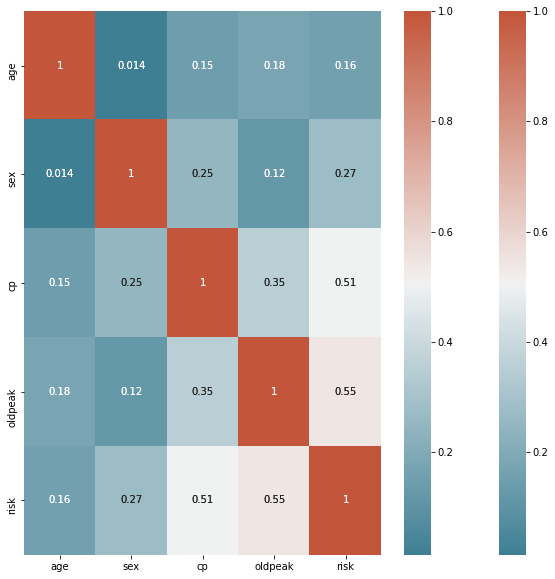

In [13]:
corr = dataset.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

###What We Learned:

1.   chest pain (cp) (+) risk
> a large amount of chest pain is a symptom/predecessor to a heart attack and can indicate an underlying condition.
Chest pain is an ordinal feature with values from 1 to 4 where: Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

2.   exercise induced angina (exang) (-) risk
> exercising makes your heart require more blood but narrowed arteries will slow down the blood flow



## **Data Preparation**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'risk'],
      dtype='object')

In [16]:
dataset.age.replace('?','')
dataset.trestbps.replace('?','')
dataset.chol.replace('?','')
dataset.thalach.replace('?','')
dataset.oldpeak.replace('?','')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
289    2.5
290    0.0
291    3.0
292    1.0
293    1.0
Name: oldpeak, Length: 294, dtype: float64

In [17]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [18]:
dataset.head

<bound method NDFrame.head of           age  trestbps      chol   thalach  ...  thal_3  thal_6  thal_7  thal_?
0   -2.542347 -0.148467 -1.681029  1.951999  ...       0       0       0       1
1   -2.414117 -0.717561 -0.117167  0.889244  ...       0       0       0       1
2   -2.414117  0.420626 -0.117167  1.314346  ...       0       0       0       1
3   -2.285888  2.127905 -0.201700  1.314346  ...       0       1       0       0
4   -2.157658 -1.855747 -0.455300  0.464142  ...       0       1       0       0
..        ...       ...       ...       ...  ...     ...     ...     ...     ...
289  0.535162  1.558812  1.122651 -1.916429  ...       0       1       0       0
290  0.791621 -0.148467  0.601364 -1.661368  ...       0       1       0       0
291  1.048080  1.274265  1.277628  0.464142  ...       0       1       0       0
292  1.304539  2.696998  1.996159 -1.236266  ...       0       0       1       0
293  2.202146 -0.148467  0.333676 -1.023715  ...       0       0       1       

## **Model Planning/Construction**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = dataset['risk']
X = dataset.drop(['risk'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [21]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,slope_?,ca_0,ca_?,thal_3,thal_6,thal_7,thal_?
282,-0.105986,-0.717561,-0.652544,-1.746389,1.558752,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
166,1.048080,-0.148467,-0.455300,1.059285,-0.646074,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
33,-1.131822,-0.717561,-0.666632,0.251591,-0.646074,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
83,-0.234215,-1.286654,-0.159434,0.039040,-0.646074,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
280,-0.618904,0.420626,0.516831,-0.173511,1.558752,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


### kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

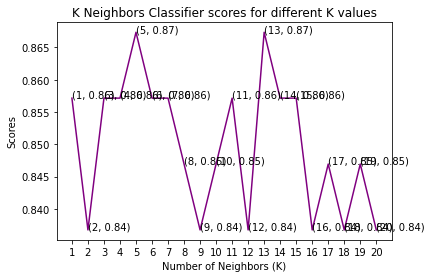

In [24]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'purple')
for i in range(1,21):
    label = round(knn_scores[i-1], 2)
    plt.text(i, knn_scores[i-1], (i, label))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Both k = 5 and k = 13 have the same accuracy of ~87%

### Support Vector Classifier

In [25]:
from sklearn.svm import SVC

svc_scores = []
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernel_type)):
    svc_classifier = SVC(kernel = kernel_type[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

<Figure size 7200x7200 with 0 Axes>

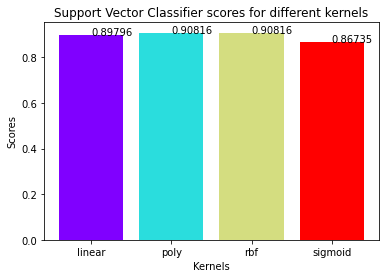

<Figure size 7200x7200 with 0 Axes>

In [26]:
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(kernel_type)))
plt.bar(kernel_type, svc_scores, color = colors)
for i in range(len(kernel_type)):
    label = round(svc_scores[i], 5)
    plt.text(i, svc_scores[i], label)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.figure(figsize=(100,100))

Both poly and rbf svm classifiers have the highest accuracy of ~91%

###Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

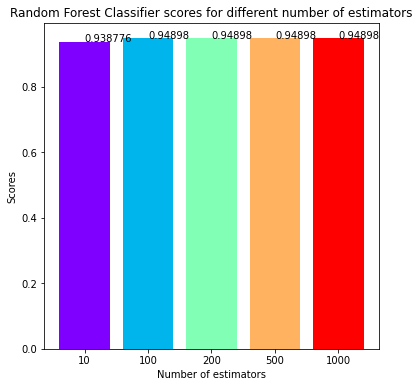

In [28]:
plt.figure(figsize=(6,6))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width = 0.8)
for i in range(len(estimators)):
    rf_scores[i] = round(rf_scores[i], 6)
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The highest accuracy is ~95% from estimators >= 100

## **Model Testing**

### kNN

In [51]:
from sklearn.metrics import classification_report 

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)


              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.83      0.85      0.84        41

    accuracy                           0.87        98
   macro avg       0.86      0.87      0.86        98
weighted avg       0.87      0.87      0.87        98

[[50  7]
 [ 6 35]]


0.8673469387755102

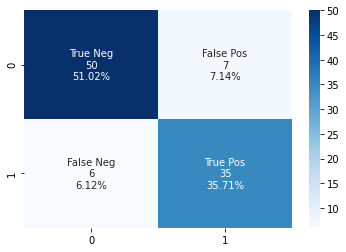

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors = 13)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
print(classification_report(y_test, predictions))


cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.87      0.80      0.84        41

    accuracy                           0.87        98
   macro avg       0.87      0.86      0.86        98
weighted avg       0.87      0.87      0.87        98

[[52  5]
 [ 8 33]]


0.8673469387755102

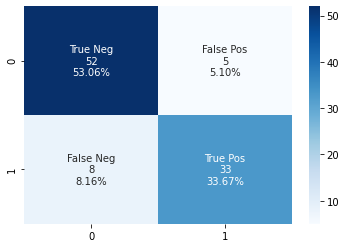

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Support Vector Classifier

In [38]:
poly_classifier = SVC(kernel = "poly")
poly_classifier.fit(X_train, y_train)
predictions = poly_classifier.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        57
           1       0.92      0.85      0.89        41

    accuracy                           0.91        98
   macro avg       0.91      0.90      0.90        98
weighted avg       0.91      0.91      0.91        98

[[54  3]
 [ 6 35]]


0.9081632653061225

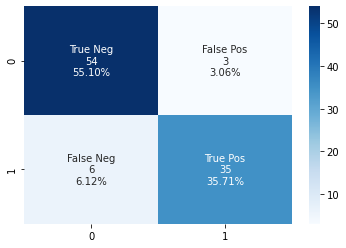

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [40]:
rbf_classifier = SVC(kernel = "rbf")
rbf_classifier.fit(X_train, y_train)
predictions = rbf_classifier.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        57
           1       0.94      0.83      0.88        41

    accuracy                           0.91        98
   macro avg       0.92      0.90      0.90        98
weighted avg       0.91      0.91      0.91        98

[[55  2]
 [ 7 34]]


0.9081632653061225

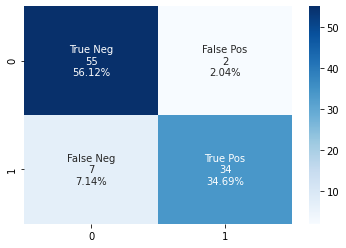

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

###Random Forest Classifier

In [42]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.95      0.93      0.94        41

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98

[[55  2]
 [ 3 38]]


0.9489795918367347

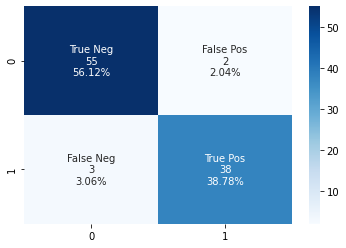

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [45]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.95      0.93      0.94        41

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98

[[55  2]
 [ 3 38]]


0.9489795918367347

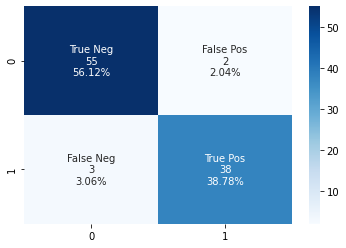

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [47]:
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state = 0)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.95      0.93      0.94        41

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98

[[55  2]
 [ 3 38]]


0.9489795918367347

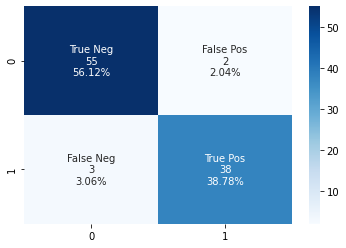

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [49]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.95      0.93      0.94        41

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98

[[55  2]
 [ 3 38]]


0.9489795918367347

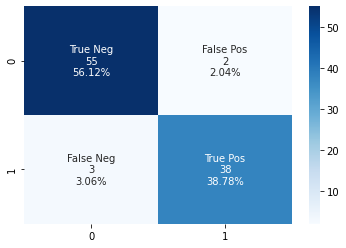

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

We can conclude that the Random Forest Classifier with 100 estimators performs best for our purposes with a precision of 95% for both positive and negative outcomes of heart attack risk.